EOS 491/526 Assignment #1
Daniel Scanks 
V00788200

Question #1

mean, standard deviaton
(-0.00014453221499184494, 0.57826038040743788)


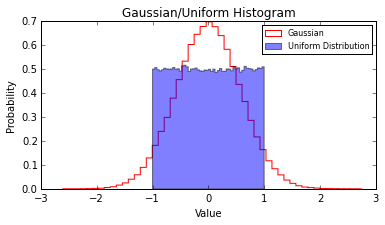

mean, standard deviaton
(0.0014620650774646378, 0.81589610098727727)


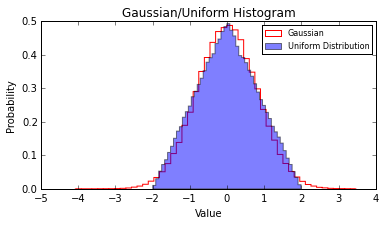

mean, standard deviaton
(-0.00090742071535572814, 1.294015729766653)


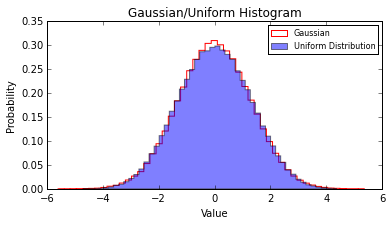

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

n1= np.random.uniform(-1,1,200000)        # 1 uniformly distributed random variable on [-1,1] with mean and std dev calculated
mean = np.mean(n1)
std = np.std(n1)
print('mean, standard deviaton')
print (mean,std)
gaussian = np.random.normal(mean,std,200000)
plt.figure(figsize=(6,3))
plt.hist(gaussian, bins=50, histtype='step', normed=True, color='r', label='Gaussian')
plt.hist(n1, bins=50, histtype='stepfilled', normed=True, color='b', alpha=0.5, label='Uniform Distribution')   #histogram
plt.title("Gaussian/Uniform Histogram")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend(prop={'size':8})
plt.show()

n1=np.random.uniform(-1,1,200000)            # 2 uniformly distributed variables added w/ same calcuations and plot
n2=np.random.uniform(-1,1,200000) 
n= n1+n2

mean = np.mean(n)
std = np.std(n)
print('mean, standard deviaton')
print (mean,std)
gaussian = np.random.normal(mean,std,200000)   
plt.figure(figsize=(6,3))
plt.hist(gaussian, bins=50, histtype='step', normed=True, color='r', label='Gaussian')
plt.hist(n, bins=50, histtype='stepfilled', normed=True, color='b', alpha=0.5, label='Uniform Distribution')   
plt.title("Gaussian/Uniform Histogram")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend(prop={'size':8})
plt.show()

n1=np.random.uniform(-1,1,200000)            # 5 uniformly distributed variables added w/ same calcuations and plot
n2=np.random.uniform(-1,1,200000) 
n3=np.random.uniform(-1,1,200000)           
n4=np.random.uniform(-1,1,200000)
n5=np.random.uniform(-1,1,200000)            
n= n1+n2+n3+n4+n5

mean = np.mean(n)
std = np.std(n)
print('mean, standard deviaton')
print (mean,std)
gaussian = np.random.normal(mean,std,200000)   
plt.figure(figsize=(6,3))
plt.hist(gaussian, bins=50, histtype='step', normed=True, color='r', label='Gaussian')
plt.hist(n, bins=50, histtype='stepfilled', normed=True, color='b', alpha=0.5, label='Uniform Distribution')   
plt.title("Gaussian/Uniform Histogram")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend( prop={'size':8})
plt.show()

    
    
    
    



Question #2

true model:
[[-6]
 [11]
 [-6]
 [ 1]]
predicted model:
[[-5.78542201]
 [ 9.30731344]
 [-4.78728689]
 [ 0.79802426]]


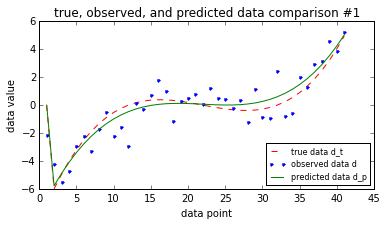

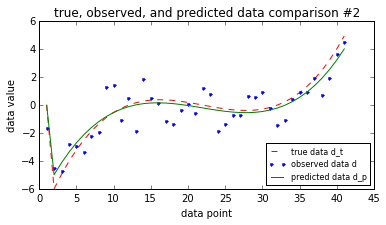

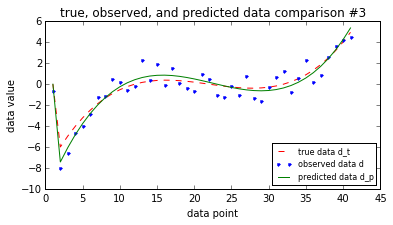

In [7]:
import numpy.linalg as ag
import matplotlib.pyplot as plt

m_t = np.array([-6,11,-6,1]) #true model
m_t = np.matrix(m_t)
mt = m_t.transpose() #mt now a column vector


A = np.zeros((41,4)) #sensitivity matrix computation
for i in range(1,41):
    z_j = (i-1)/10.
    coeff = np.array([1,z_j,z_j**2,z_j**3])
    A[i,:] = coeff

#have that A*mt = d_t
d_t = np.dot(A,mt) #accurate data

error1 = np.random.normal(0,1,41) # making 3 different sets of error columns  
error1 = np.matrix(error1)        # to add to d_t
error1 = error1.transpose()

error2 = np.random.normal(0,1,41)
error2 = np.matrix(error2)
error2 = error2.transpose()

error3 = np.random.normal(0,1,41)
error3 = np.matrix(error3)
error3 = error3.transpose()

d1 = d_t + error1 # 3 observed data sets (different noise values)
d2 = d_t + error2
d3 = d_t + error3

#solution(s)

A = np.matrix(A)
A_t = A.transpose()
dot = np.dot(A_t,A)
invdot = ag.inv(dot)
product = np.dot(invdot,A_t)
m1 = np.dot(product,d1)
print('true model:')
print mt
print ('predicted model:')
print m1 #compared with m_t in text cell below

d_p1 = np.dot(A,m1) #predicted data set

m2 = np.dot(product,d2) #other model predictions
d_p2 = np.dot(A,m2)
m3 = np.dot(product,d3)
d_p3 = np.dot(A,m3)

x = np.linspace(1,41,41) #x axis (corresponds to data point)
x= np.matrix(x)
x = x.transpose()


plt.figure(figsize=(6,3))
plt.plot(x,d_t,'r--', label = 'true data d_t')   #graphs for 3 error realizations
plt.plot(x,d1,'b.', label = 'observed data d')
plt.plot(x,d_p1,'g-', label = 'predicted data d_p')
plt.legend(prop={'size':8}, loc ='lower right')
plt.xlabel('data point')
plt.ylabel('data value')
plt.title('true, observed, and predicted data comparison #1')
plt.show()

plt.figure(figsize=(6,3))
plt.plot(x,d_t,'r--', label = 'true data d_t')
plt.plot(x,d2,'b.', label = 'observed data d')
plt.plot(x,d_p2,'g-', label = 'predicted data d_p')
plt.legend(prop={'size':8}, loc ='lower right')
plt.xlabel('data point')
plt.ylabel('data value')
plt.title('true, observed, and predicted data comparison #2')
plt.show()

plt.figure(figsize=(6,3))
plt.plot(x,d_t,'r--', label = 'true data d_t')
plt.plot(x,d3,'b.', label = 'observed data d')
plt.plot(x,d_p3,'g-', label = 'predicted data d_p')
plt.legend(prop={'size':8}, loc ='lower right')
plt.xlabel('data point')
plt.ylabel('data value')
plt.title('true, observed, and predicted data comparison #3')
plt.show()


The precicted ML solution is close to the true model, but not exact, as the added noise has made the interpretation less accurate.